### Pregunta 1

#### a)


In [3]:
import urllib
import pandas as pd

'''
train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data1.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data1.csv")
'''
#comentado porque ya guardé los csv una vez

train_df = pd.DataFrame.from_csv("train_data1.csv",header=0,index_col=0)
test_df = pd.DataFrame.from_csv("test_data1.csv",header=0,index_col=0)
train_df.tail()
#test_df.tail()


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
524,7,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
525,8,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
526,9,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
527,10,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304
528,11,-4.261,1.827,-0.482,-0.194,0.731,0.354,-0.478,0.050,-0.112,0.321


Se descargan los archivos csv y se cargan en dataframes. El set de entrenamiento tiene 528 registros y el de test tiene 462. 

#### b)

In [4]:
from sklearn.preprocessing import StandardScaler
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)

#### c) PCA

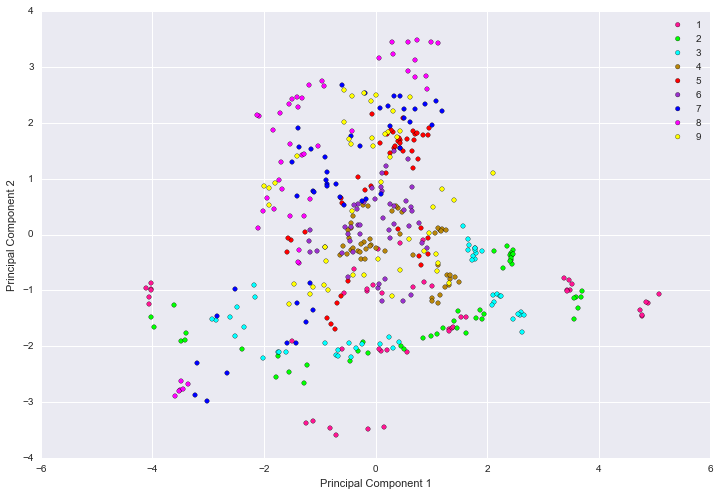

In [5]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
#cmap = plt.cm.get_cmap('jet')
colores = ['deeppink', 'lime', 'aqua', 'darkgoldenrod', 'r', 'darkorchid', 'b', 'magenta','yellow','lightcyan']
cmap = colors.ListedColormap(colores)
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
fig = plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)

fig.savefig('plots/PCA.png')
plt.show()

#### d) LDA

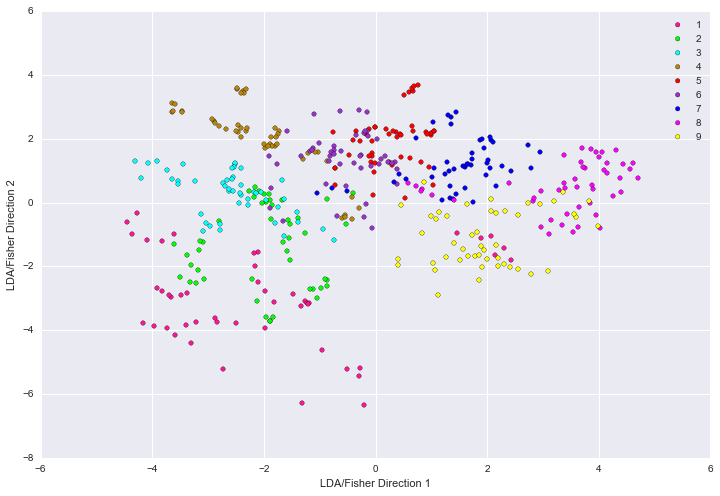

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
#cmap = plt.cm.get_cmap('jet')
colores = ['deeppink', 'lime', 'aqua', 'darkgoldenrod', 'r', 'darkorchid', 'b', 'magenta','yellow','lightcyan']
cmap = colors.ListedColormap(colores)
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
fig2 = plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab, c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)

fig2.savefig('plots/LDA.png')
plt.show()

#### e)

En PCA las clases están mucho más mezcladas, la mayoría de ellas tienen puntos cerca del centro y es imposible diferenciarlas. En LDA aunque no se logra diferenciar completamente las clases, están mucho mejor separadas y sólo hay 2 clases (la morada (4) y la roja (5)) que no se pueden aislar parcialmente. 

LDA encuentra un mejor resultado porque considera las etiquetas e intenta maximizar la separación entre las clases.

Para elegir la mejor técnica se podría asignar un área a cada clase (de distintas formas, por ejemplo un círculo centrado en el promedio y que el radio sea el minimo para considerar todos los puntos o un poligono que marque el "outline" uniendo puntos de la clase) y luego elegir el método que minimice el traslape entre las áreas de las clases.

#### f)

In [7]:
from random import randint
def random_classifier(train_labels):
    frecuencia = np.bincount(train_labels.astype(np.int32))
    suma = sum(frecuencia)
    for i in range(1,len(frecuencia)):
        frecuencia[i] = frecuencia[i]+frecuencia[i-1]         
    
    azar = randint(1,suma)
    for i in range(len(frecuencia)):
        if(azar <= frecuencia[i]):
            prediccion = i
            break;
    return prediccion

random_classifier(y)

4

A partir de un set de labels (en este caso el arreglo "y") se calcula la frecuencia de cada clase, se genera un arreglo de frecuencia acumulada y luego se tira un número al azar para determinar a que clase se asigna el nuevo x a priori.

#### g)

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_std,y)
print "LDA Train: ", lda_model.score(X_std,y)
print "LDA Test: ", lda_model.score(X_std_test,ytest)
print "-"*25
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_std,y)
print "QDA Train: ", qda_model.score(X_std,y)
print "QDA Test: ", qda_model.score(X_std_test,ytest)
print "-"*25
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_std,y)
print "KNN Train: ", knn_model.score(X_std,y)
print "KNN Test: ", knn_model.score(X_std_test,ytest)

LDA Train:  0.683712121212
LDA Test:  0.452380952381
-------------------------
QDA Train:  0.988636363636
QDA Test:  0.415584415584
-------------------------
KNN Train:  0.931818181818
KNN Test:  0.491341991342


QDA tiene el mejor comportamiento sobre el set de entrenamiento, ya que las fronteras cuadráticas se ajustan bien a los datos, pero para el caso de test están sobreajustados. KNN tiene un comportamiento muy bueno en el set de entrenamiento pero además es el mejor de los tres modelos en el set de pruebas.

In [9]:
variar_k = 50
knn_test = np.zeros(variar_k)
knn_train = np.zeros(variar_k)
for i in range(variar_k):
    knn_model = KNeighborsClassifier(n_neighbors=i+1)
    knn_model.fit(X_std,y)
    knn_test[i] = knn_model.score(X_std_test,ytest)
    knn_train[i] = knn_model.score(X_std,y)


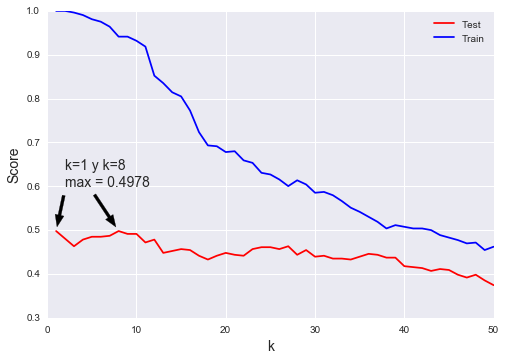

In [10]:
eje_x = range(1,variar_k+1)
fig = plt.figure()
plt.plot(eje_x, knn_test, color="r", linestyle="-", label="Test")
plt.plot(eje_x, knn_train, color="b", linestyle="-", label="Train")
plt.xlabel('k', fontsize=14)
plt.ylabel('Score', fontsize=14)
leg = plt.legend(loc='upper right', fancybox=True)

plt.annotate('max = '+str('%.4f'%max(knn_test)), xy=(np.argmax(knn_test)+1, max(knn_test)), xytext=(2, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.1, width = 3, headwidth=9),size=14)
plt.annotate('',xy=(np.argmax(knn_test[1:])+2, max(knn_test)), xytext=(5,0.59),
             arrowprops=dict(facecolor='black',shrink=0.1, width = 3, headwidth=9))
plt.annotate('k='+str(np.argmax(knn_test)+1)+' y k='+str(np.argmax(knn_test[1:])+2),xy=(2,0.64),size=14)


fig.savefig('plots/KNN_k.png')

plt.show()

Al graficar el comportamiento de KNN se encuentran los k que máximizan el score con los datos de prueba, además se observa que el score en los datos de entrenamiento tiene una fuerte tendencia descendente al aumentar k mientras que en los datos de prueba el score va empeorando de a poco.

#### h)

In [22]:
knn_test = np.zeros(10)
knn_train = np.zeros(10)
lda_test = np.zeros(10)
lda_train = np.zeros(10)
qda_test = np.zeros(10)
qda_train = np.zeros(10)
from sklearn.metrics import accuracy_score

for i in range(1,11):
    datos_PCA = PCA(n_components=i)
    X_pca = datos_PCA.fit_transform(X_std)
    X_pca_test = datos_PCA.transform(X_std_test)
    #creamos modelos
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_pca,y)    
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_pca,y)    
    knn_model = KNeighborsClassifier(n_neighbors=10)
    knn_model.fit(X_pca,y)
    #score los modelos
    knn_test[i-1] = knn_model.score(X_pca_test,ytest)
    knn_train[i-1] = knn_model.score(X_pca,y)
    qda_test[i-1] = qda_model.score(X_pca_test,ytest)
    qda_train[i-1] = qda_model.score(X_pca,y)
    lda_test[i-1] = lda_model.score(X_pca_test,ytest)
    lda_train[i-1] = lda_model.score(X_pca,y)    


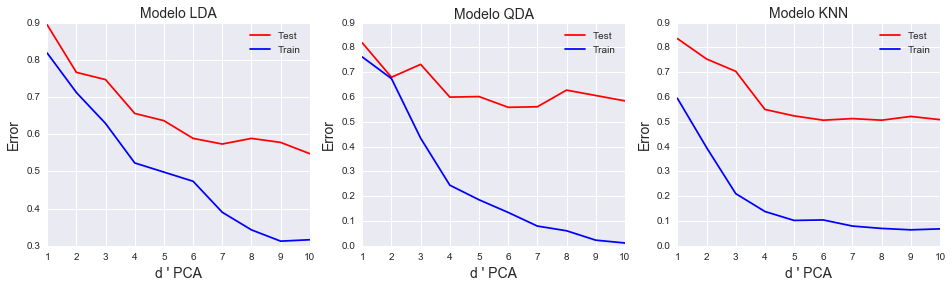

Errores mínimos de test
-----------------------
LDA:  0.5476  Dimensiones: 10
QDA:  0.5584  Dimensiones: 6
KNN:  0.5065  Dimensiones: 6


In [24]:
eje_x = range(1,11)
fig = plt.figure(figsize=(16, 4), dpi=100)

fig.add_subplot(131)
plt.plot(eje_x, 1-lda_test, color="r", linestyle="-", label="Test")
plt.plot(eje_x, 1-lda_train, color="b", linestyle="-", label="Train")
plt.xlabel("d ' PCA", fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Modelo LDA', fontsize=14)
leg = plt.legend(loc='upper right', fancybox=True)

fig.add_subplot(132)
plt.plot(eje_x, 1-qda_test, color="r", linestyle="-", label="Test")
plt.plot(eje_x, 1-qda_train, color="b", linestyle="-", label="Train")
plt.xlabel("d ' PCA", fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Modelo QDA', fontsize=14)
leg = plt.legend(loc='upper right', fancybox=True)

fig.add_subplot(133)
plt.plot(eje_x, 1-knn_test, color="r", linestyle="-", label="Test")
plt.plot(eje_x, 1-knn_train, color="b", linestyle="-", label="Train")
plt.xlabel("d ' PCA", fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Modelo KNN', fontsize=14)
leg = plt.legend(loc='upper right', fancybox=True)

fig.savefig('plots/Todos_PCA.png')
plt.show()

print "Errores mínimos de test"
print "-----------------------"
print "LDA: ", '%.4f'%(1-max(lda_test)), " Dimensiones:", np.argmax(lda_test)+1
print "QDA: ", '%.4f'%(1-max(qda_test)), " Dimensiones:", np.argmax(qda_test)+1
print "KNN: ", '%.4f'%(1-max(knn_test)), " Dimensiones:", np.argmax(knn_test)+1

En los gráficos se observa que el error de entrenamiento es cada vez menor mientras aumentan las dimensiones, el modelo KNN tiene el menor error de entrenamiento cuando las dimensiones se reducen a menos de 6, con más dimensiones QDA tiene el menor error de entrenamiento llegando casi a 0, que era lo esperado ya que QDA se puede ajustar mucho a los datos.

En QDA el error de test varía más que el resto, para LDA y KNN el error desciende casi monótonamente con un par de excepciones. El modelo con menor error es KNN para más de 3 dimensiones, al reducir a 2 dimensiones se ajusta mejor QDA pero el error es cercano a 70% por lo que tampoco se puede considerar como un muy buen modelo.

#### i)

In [25]:
knn_test = np.zeros(10)
knn_train = np.zeros(10)
lda_test = np.zeros(10)
lda_train = np.zeros(10)
qda_test = np.zeros(10)
qda_train = np.zeros(10)

for i in range(1,11):
    datos_LDA = LinearDiscriminantAnalysis(n_components=i)
    X_lda = datos_LDA.fit_transform(X_std,y)
    X_lda_test = datos_LDA.transform(X_std_test)
    #creamos modelos
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_lda,y)    
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(X_lda,y)    
    knn_model = KNeighborsClassifier(n_neighbors=10)
    knn_model.fit(X_lda,y)
    #score los modelos
    knn_test[i-1] = knn_model.score(X_lda_test,ytest)
    knn_train[i-1] = knn_model.score(X_lda,y)
    qda_test[i-1] = qda_model.score(X_lda_test,ytest)
    qda_train[i-1] = qda_model.score(X_lda,y)
    lda_test[i-1] = lda_model.score(X_lda_test,ytest)
    lda_train[i-1] = lda_model.score(X_lda,y)    

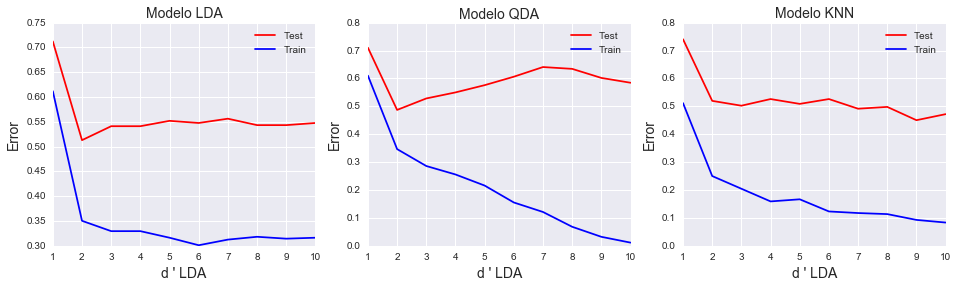

Errores mínimos de test
-----------------------
LDA:  0.5130  Dimensiones: 2
QDA:  0.4870  Dimensiones: 2
KNN:  0.4502  Dimensiones: 9


In [26]:
fig = plt.figure(figsize=(16, 4), dpi=100)

fig.add_subplot(131)
plt.plot(eje_x, 1-lda_test, color="r", linestyle="-", label="Test")
plt.plot(eje_x, 1-lda_train, color="b", linestyle="-", label="Train")
plt.xlabel("d ' LDA", fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Modelo LDA', fontsize=14)
leg = plt.legend(loc='upper right', fancybox=True)

fig.add_subplot(132)
plt.plot(eje_x, 1-qda_test, color="r", linestyle="-", label="Test")
plt.plot(eje_x, 1-qda_train, color="b", linestyle="-", label="Train")
plt.xlabel("d ' LDA", fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Modelo QDA', fontsize=14)
leg = plt.legend(loc='upper right', fancybox=True)

fig.add_subplot(133)
plt.plot(eje_x, 1-knn_test, color="r", linestyle="-", label="Test")
plt.plot(eje_x, 1-knn_train, color="b", linestyle="-", label="Train")
plt.xlabel("d ' LDA", fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.title('Modelo KNN', fontsize=14)
leg = plt.legend(loc='upper right', fancybox=True)

fig.savefig('plots/Todos_LDA.png')
plt.show()

print "Errores mínimos de test"
print "-----------------------"
print "LDA: ", '%.4f'%(1-max(lda_test)), " Dimensiones:", np.argmax(lda_test)+1
print "QDA: ", '%.4f'%(1-max(qda_test)), " Dimensiones:", np.argmax(qda_test)+1
print "KNN: ", '%.4f'%(1-max(knn_test)), " Dimensiones:", np.argmax(knn_test)+1

En los datos se observa que el error mínimo de prueba es menor para los tres modelos con respecto a PCA, y KNN logra un error menor incluso que el que tiene con los datos completos al reducir a 9 dimensiones con LDA.

El error de entrenamiento es mucho menor que en PCA, sobre todo cuando se reducen mucho las dimensiones. Entre los modelos llama la atención que en general LDA se comporta mejor que QDA, aunque QDA tiene un mejor mínimo en 2 dimensiones.

La principal conclusión es que en general KNN obtiene mejores predicciones que LDA y QDA cuando se comparan los escendarios óptimos, y que la reducción de dimensionalidad puede traer mejores resultados que el modelar con todos los datos.